In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy

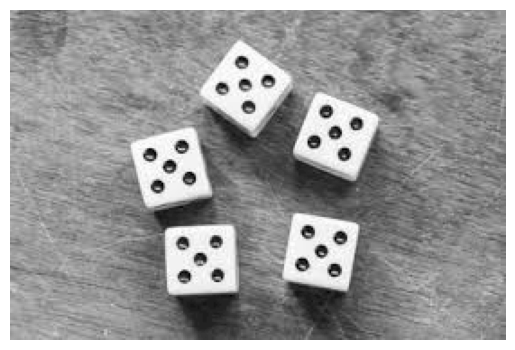

In [3]:
image = cv2.imread("input/5dice.png" , cv2.IMREAD_GRAYSCALE)
plt.imshow(image  , cmap="gray")
plt.axis("off")
plt.show()

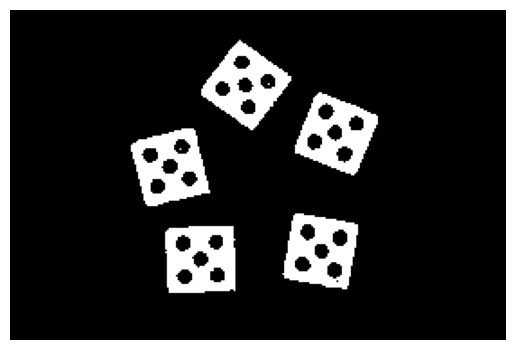

In [4]:
_ , thresh = cv2.threshold(image , 210 , 255  , cv2.THRESH_BINARY)
plt.imshow(thresh , cmap="gray")
plt.axis("off")
plt.show()

In [5]:
contours , hierarchy = cv2.findContours(thresh , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE) 
print(hierarchy)
dice = image.copy()
temp = []
array=[]
number_of_dices = 0 
for contour in contours :
    if cv2.contourArea(contour) > 50 :
        x , y , w , h = cv2.boundingRect(contour)
        cv2.rectangle(dice , (x,y) , (x+w-1 , y+h-1) , (0 , 0 , 0) , 1)


for i in range(len(hierarchy[0])):
        array.append(hierarchy[0][i][3])
        print(hierarchy[0][i][3])
print(array)       
print(len(array))

for i in range(len(array)):
     if array[i] == -1 :
          number_of_dices +=1
print(number_of_dices)


number_of_inside_bounding_box = 0
for i in range(len(array)-1)   :     
    if hierarchy [0][i][3] > 0 :
        number_of_inside_bounding_box += 1 
    if hierarchy [0][i][3] == -1 and  i!= 0 :        
        number_of_inside_bounding_box = 0
    temp.append(number_of_inside_bounding_box)


 

[[[ 6 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [-1  4 -1  0]
  [13  0  7 -1]
  [ 8 -1 -1  6]
  [ 9  7 -1  6]
  [10  8 -1  6]
  [11  9 -1  6]
  [12 10 -1  6]
  [-1 11 -1  6]
  [20  6 14 -1]
  [15 -1 -1 13]
  [16 14 -1 13]
  [17 15 -1 13]
  [18 16 -1 13]
  [-1 17 19 13]
  [-1 -1 -1 18]
  [26 13 21 -1]
  [22 -1 -1 20]
  [23 21 -1 20]
  [24 22 -1 20]
  [25 23 -1 20]
  [-1 24 -1 20]
  [-1 20 27 -1]
  [28 -1 -1 26]
  [29 27 -1 26]
  [30 28 -1 26]
  [32 29 31 26]
  [-1 -1 -1 30]
  [-1 30 -1 26]]]
-1
0
0
0
0
0
-1
6
6
6
6
6
6
-1
13
13
13
13
13
18
-1
20
20
20
20
20
-1
26
26
26
26
30
26
[-1, 0, 0, 0, 0, 0, -1, 6, 6, 6, 6, 6, 6, -1, 13, 13, 13, 13, 13, 18, -1, 20, 20, 20, 20, 20, -1, 26, 26, 26, 26, 30, 26]
33
5


[0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 13, 13, 13, 13, 13, 20, 20, 20, 20, 20, 26, 26, 26, 26, 26]
Unique Item List [0, 6, 13, 20, 26]
count_occurrences 0  = 5
count_occurrences 6  = 6
count_occurrences 13  = 5
count_occurrences 20  = 5
count_occurrences 26  = 5


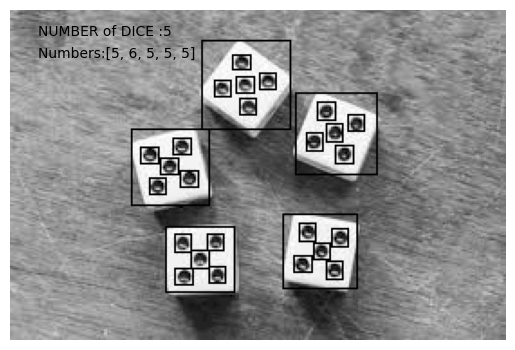

In [6]:

temp =[]
count = []
a = array
for i in range(len(a)-1):
    if a[i] == a[i+1] :
        temp.append(a[i])
    if a[i] != a[i+1] and a[i-1] == a[i] :
         temp.append(a[i])
if a[-1] == a[-3] :
     temp.append(a[-1])  
print(temp)


mylist = temp 
newlist = [] # empty list to hold unique elements from the list
for i in mylist:
    if i not in newlist:
        newlist.append(i) 
print("Unique Item List", newlist) # prints the final list of 

accurances = []
for i in range(len(newlist)):
    count_occurrences = a.count(newlist[i])
    accurances.append(count_occurrences)
    print(f"count_occurrences {newlist[i]}  = {count_occurrences}" )     


plt.axis("off")  
plt.text(image.shape[0] /12 , image.shape[0]/13 , f"NUMBER of DICE :{number_of_dices}" )
plt.text(image.shape[0] /12 , image.shape[0]/7 , f"Numbers:{accurances}" )
plt.imshow(cv2.cvtColor(dice , cv2.COLOR_BGR2RGB))
plt.show()   